In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as sts
import seaborn as sns

In [116]:
#load data
life = os.path.join('DataSets', 'life_expectancy_at_birth.csv')
pop = os.path.join('DataSets', 'population_by_education_level.csv')
eu = os.path.join('DataSets', 'EU_Country_Codes.csv')

life_df = pd.read_csv(life)
life_df = life_df.dropna()

pop_df = pd.read_csv(pop)
pop_df = pop_df.dropna()

eu_df = pd.read_csv(eu,names=['geography','country'], header = None).drop_duplicates()

In [3]:
life_df['geography'].unique()

array(['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES',
       'EU27_2020', 'EU28', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT',
       'LT', 'LU', 'LV', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'SE', 'SI',
       'SK', 'UK'], dtype=object)

In [4]:
life_df = life_df.drop(life_df[life_df['geography']=='EU27_2020'].index)
life_df = life_df.drop(life_df[life_df['geography']=='EU28'].index)

In [5]:
life_df['sex'].unique()

array(['F', 'M'], dtype=object)

In [6]:
pop_df['geography'].unique()

array(['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EA19', 'EE', 'EL',
       'ES', 'EU27_2020', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LT',
       'LU', 'LV', 'ME', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS',
       'SE', 'SI', 'SK', 'TR', 'EU15', 'EU28', 'UK'], dtype=object)

In [7]:
pop_df = pop_df.drop(pop_df[pop_df['geography']=='EU27_2020'].index)
pop_df = pop_df.drop(pop_df[pop_df['geography']=='EU28'].index)
pop_df = pop_df.drop(pop_df[pop_df['geography']=='EU15'].index)

In [8]:
pop_df['geography'].unique()

array(['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EA19', 'EE', 'EL',
       'ES', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV',
       'ME', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI',
       'SK', 'TR', 'UK'], dtype=object)

In [9]:
pop_df['sex'].unique()

array(['F', 'M', 'T'], dtype=object)

In [10]:
# drop rows with sex ==T
pop_df = pop_df.drop(pop_df[pop_df['sex']=='T'].index)
pop_df['sex'].unique()

array(['F', 'M'], dtype=object)

In [11]:
# drop rows with geography ==Total
pop_df = pop_df.drop(pop_df[pop_df['isced11']=='TOTAL'].index)

In [12]:
pop_df['date'].unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
       1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988,
       1987, 1986, 1985, 1984, 1983])

In [13]:
# merge data frames
life_pop_df = pd.merge(pop_df, life_df, on=['date','geography','sex'], how='inner')
life_pop_eu_df = pd.merge(life_pop_df, eu_df, on='geography', how='left')

In [14]:
life_pop_eu_df = life_pop_eu_df.drop(columns=['unit_x', 'unit_y','statinfo' ])

In [15]:
life_pop_eu_df = life_pop_eu_df.rename(columns={'value_y': 'age_in_year',
                                               'value_x':'population_in_THS',})
life_pop_eu_df['age'].unique()

array(['Y15-19', 'Y15-24', 'Y15-39', 'Y15-59', 'Y15-64', 'Y15-74',
       'Y20-24', 'Y20-64', 'Y25-29', 'Y25-39', 'Y25-49', 'Y25-54',
       'Y25-59', 'Y25-64', 'Y25-74', 'Y30-34', 'Y35-39', 'Y40-44',
       'Y40-59', 'Y40-64', 'Y45-49', 'Y50-54', 'Y50-59', 'Y50-64',
       'Y50-74', 'Y55-59', 'Y55-64', 'Y60-64', 'Y65-69'], dtype=object)

In [16]:
life_pop_eu_df['date'].unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008])

In [17]:
total_pop_groupby = pd.DataFrame(life_pop_eu_df.groupby(['sex','age', 'geography','date']).sum()['population_in_THS'])
total_pop_groupby = total_pop_groupby.rename(columns={'population_in_THS': 'population_total'})

In [18]:
life_pop_eu_total_df = pd.merge(life_pop_eu_df, total_pop_groupby, on=['sex', 'age','geography','date'],how='inner')

In [19]:
life_pop_eu_total_df['percentage'] = life_pop_eu_total_df['population_in_THS']/life_pop_eu_total_df['population_total']

In [20]:
clean_df = life_pop_eu_total_df

In [21]:
life_df_ana = life_df.reset_index()
life_df_ana.head()

,index,unit,sex,statinfo,geography,date,value
0,0,YR,F,LE_0,AT,2008,83.3
1,1,YR,F,LE_0,BE,2008,82.6
2,2,YR,F,LE_0,BG,2008,77.0
3,3,YR,F,LE_0,CH,2008,84.6
4,4,YR,F,LE_0,CY,2008,82.9


In [22]:
#statistic description of life expectancy
country_lf = life_df_ana.groupby(['sex', 'geography'])['value']
country_lf_stat = country_lf.agg(['mean', 'median','var','std','sem']).sort_values(by=['var'])
country_lf_stat

mean  median       var       std       sem
sex geography                                                 
F   DE         83.191667   83.10  0.097197  0.311764  0.089999
    NL         83.175000   83.20  0.098409  0.313702  0.090558
    AT         83.775000   83.80  0.105682  0.325087  0.093845
    FR         85.550000   85.65  0.137273  0.370503  0.106955
    IS         84.100000   84.10  0.158182  0.397721  0.114812
...                  ...     ...       ...       ...       ...
M   SK         72.833333   73.00  1.155152  1.074780  0.310262
    MT         79.433333   79.70  1.416970  1.190365  0.343629
    LV         69.008333   69.20  1.506288  1.227309  0.354294
    LT         68.891667   68.85  2.731742  1.652798  0.477122
    EE         72.216667   72.60  2.945152  1.716144  0.495408

[62 rows x 5 columns]

In [23]:
# box plot of the life expectancy of Female from 2008-2019
lf_female = life_df_ana[life_df_ana['sex']=='F']

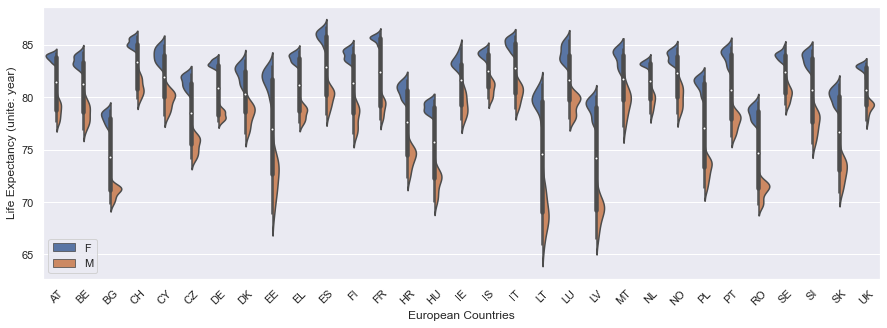

In [134]:
plt.figure(figsize=(15,5))
chart = sns.violinplot(x='geography', y='value', data = life_df_ana, width=0.8, hue='sex', split=True)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.legend(loc=3)
plt.ylabel('Life Expectancy (unite: year)')
plt.xlabel('European Countries')
plt.savefig('violinBycountry2.png')

In [25]:
# box plot of the life expectancy of Male from 2008-2019
lf_male = life_df_ana[life_df_ana['sex']=='M']

In [26]:
yearly_lf = life_df_ana.groupby(['sex', 'date'])['value']
yearly_lf_stat = yearly_lf.agg(['mean', 'median','var','std','sem']).sort_values(by=['mean']).reset_index()
yearly_lf_stat

,sex,date,mean,median,var,std,sem
0,M,2008,75.277419,77.10,16.713806,4.088252,0.734272
1,M,2009,75.616129,77.50,15.116065,3.887938,0.698294
2,M,2010,75.880000,77.65,14.899586,3.859998,0.704736
3,M,2011,76.358065,78.00,14.017183,3.743953,0.672434
4,M,2012,76.403333,78.05,13.923782,3.731458,0.681268
5,M,2013,76.856667,78.45,13.571506,3.683952,0.672595
6,M,2015,77.170968,78.70,13.173462,3.629526,0.651882
7,M,2014,77.209677,78.80,13.946237,3.734466,0.670730
8,M,2016,77.470968,79.00,13.232129,3.637599,0.653332
9,M,2017,77.587097,79.20,12.833828,3.582433,0.643424


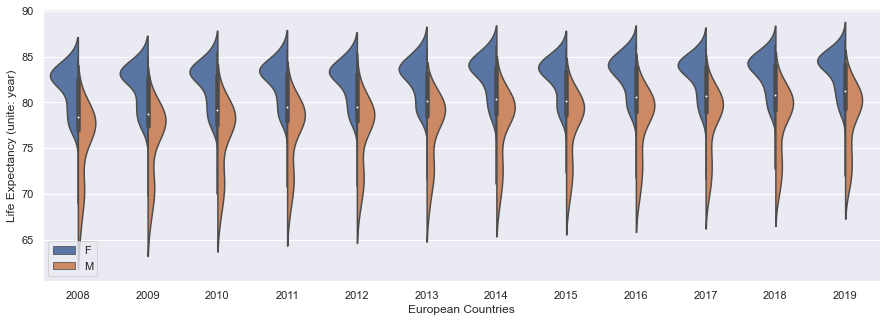

In [135]:
plt.figure(figsize=(15,5))
chart = sns.violinplot(x='date', y='value', data = life_df_ana, width=0.8, hue='sex', split=True)
chart.set_xticklabels(chart.get_xticklabels())
chart.legend(loc=3)
plt.ylabel('Life Expectancy (unite: year)')
plt.xlabel('European Countries')
plt.savefig('violinByyear2.png')

In [28]:
# yw = os.path.join('DataSets', 'complete_dataset.csv')
# r_merge_df = pd.read_csv(yw)
# r_merge_df.head()

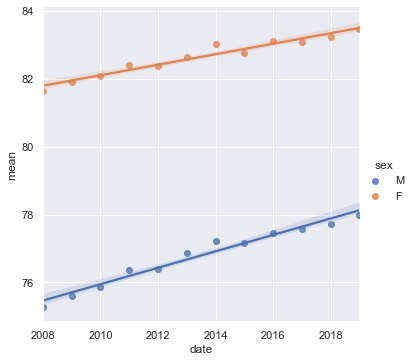

In [131]:
sns.set_theme(color_codes=True)
lf_reg_gender = sns.lmplot(x='date', y='mean', hue='sex', data=yearly_lf_stat)
plt.savefig('regByyear.png')

In [34]:
import statsmodels.api as sm
model = sm.OLS.from_formula('mean~sex*date', data=yearly_lf_stat)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mean   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3251.
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           4.77e-27
Time:                        11:37:27   Log-Likelihood:                 13.804
No. Observations:                  24   AIC:                            -19.61
Df Residuals:                      20   BIC:                            -14.90
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -228.6612     25.110     -9.106      0.000    -281.039    -176.283
sex[T.M]       -181.2107     35.511     -5.103      0.000    -255.284    -107.137
date              0.1546      0.012     12.398      0.000       0.129       0.181
sex[T.M]:date     0.0871      0.018      4.938      0.000       0.050       0.124
==============================================================================
Omnibus:                        3.150   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.207   Jarque-Bera (JB):                2.561
Skew:                           0.784   Prob(JB):                        0.278
Kurtosis:                       2.680   Cond. No.                     3.07e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
clean_df.head(20)

,sex,age,isced11,geography,date,population_in_THS,age_in_year,country,population_total,percentage
0,F,Y15-19,ED0-2,AT,2019,149.6,84.2,Austria,208.9,0.716132
1,F,Y15-19,ED3_4,AT,2019,52.4,84.2,Austria,208.9,0.250838
2,F,Y15-19,ED5-8,AT,2019,6.9,84.2,Austria,208.9,0.033030
3,F,Y15-24,ED0-2,AT,2019,173.8,84.2,Austria,457.6,0.379808
4,F,Y15-24,ED3_4,AT,2019,196.0,84.2,Austria,457.6,0.428322
5,F,Y15-24,ED5-8,AT,2019,87.8,84.2,Austria,457.6,0.191871
6,F,Y15-39,ED0-2,AT,2019,274.0,84.2,Austria,1340.6,0.204386
7,F,Y15-39,ED3_4,AT,2019,581.9,84.2,Austria,1340.6,0.434059
8,F,Y15-39,ED5-8,AT,2019,484.7,84.2,Austria,1340.6,0.361555
9,F,Y15-59,ED0-2,AT,2019,517.5,84.2,Austria,2630.1,0.196761


In [32]:
clean_df['age'].unique()

array(['Y15-19', 'Y15-24', 'Y15-39', 'Y15-59', 'Y15-64', 'Y15-74',
       'Y20-24', 'Y20-64', 'Y25-29', 'Y25-39', 'Y25-49', 'Y25-54',
       'Y25-59', 'Y25-64', 'Y25-74', 'Y30-34', 'Y35-39', 'Y40-44',
       'Y40-59', 'Y40-64', 'Y45-49', 'Y50-54', 'Y50-59', 'Y50-64',
       'Y50-74', 'Y55-59', 'Y55-64', 'Y60-64', 'Y65-69'], dtype=object)

In [33]:
clean_df['isced11'].unique()

array(['ED0-2', 'ED3_4', 'ED5-8', 'NRP'], dtype=object)

In [68]:
def chi2test(edu_level, geography_ID, age_level):
    fm_pop = clean_df[(clean_df['sex']=='F') & (clean_df['isced11']==edu_level) & (clean_df['geography']==geography_ID) & (clean_df['age']==age_level)]
    m_pop = clean_df[(clean_df['sex']=='M') & (clean_df['isced11']==edu_level) & (clean_df['geography']==geography_ID) & (clean_df['age']==age_level)]
    fm_m_pop = pd.merge(fm_pop, m_pop, on='date', how='inner')
    chi2_stats, chi2pvalue = sts.chisquare(fm_m_pop['population_in_THS_x'].tolist(), fm_m_pop['population_in_THS_y'].tolist())
    return chi2_stats, chi2pvalue

In [66]:
fm_m_pop.head()

,sex_x,age_x,isced11_x,geography,date_x,population_in_THS_x,age_in_year_x,country_x,population_total_x,percentage_x,sex_y,age_y,isced11_y,date_y,population_in_THS_y,age_in_year_y,country_y,population_total_y,percentage_y
0,F,Y15-24,ED5-8,AT,2019,87.8,84.2,Austria,457.6,0.191871,M,Y15-24,ED5-8,2019,65.9,79.7,Austria,458.2,0.143824
1,F,Y15-24,ED5-8,BE,2019,110.5,84.3,Belgium,633.9,0.174318,M,Y15-24,ED5-8,2019,75.9,79.8,Belgium,657.8,0.115385
2,F,Y15-24,ED5-8,BG,2019,10.8,78.8,Bulgaria,300.8,0.035904,M,Y15-24,ED5-8,2019,8.4,71.6,Bulgaria,317.2,0.026482
3,F,Y15-24,ED5-8,CH,2019,39.9,85.8,NaN,431.9,0.092382,M,Y15-24,ED5-8,2019,25.4,82.1,NaN,454.2,0.055923
4,F,Y15-24,ED5-8,CY,2019,11.6,84.4,Cyprus,49.2,0.235772,M,Y15-24,ED5-8,2019,3.2,80.3,Cyprus,44.0,0.072727


In [67]:
# perform chi-square test 
sts.chisquare(fm_m_pop['population_in_THS_x'].tolist(), fm_m_pop['population_in_THS_y'].tolist())

Power_divergenceResult(statistic=454.7174850254211, pvalue=9.760936009766676e-72)

In [77]:
xlist = []
ylist = []
edu = []
eu_ID = []
age_level = []
for i in clean_df['isced11'].unique():
    for j in clean_df['geography'].unique():
        for k in clean_df['age'].unique():
            x, y = chi2test(i,j,k)
            xlist.append(x)
            ylist.append(y)
            edu.append(i)
            eu_ID.append(j)
            age_level.append(k)

In [120]:
chi2_df = pd.DataFrame({'isced11': edu,
                        'geography': eu_ID,
                        'age': age_level,
                       'chi2_stats': xlist,
                       'chi2_pvalue': ylist})  
diff = chi2_df[(chi2_df['chi2_pvalue']<0.05)]
diff.head()

,isced11,geography,age,chi2_stats,chi2_pvalue
0,ED0-2,AT,Y15-19,23.545504,1.479151e-02
1,ED0-2,AT,Y15-24,35.692368,1.903627e-04
3,ED0-2,AT,Y15-59,489.294151,6.147911e-98
4,ED0-2,AT,Y15-64,792.547784,7.542331e-163
5,ED0-2,AT,Y15-74,1711.129900,0.000000e+00


In [136]:
bar_df = diff.groupby(['geography', 'age']).count()['isced11'].reset_index()

geographyies = bar_df[bar_df['isced11']==4]['geography'].unique().tolist()
for geography in geographyies:
    print(eu_df[eu_df['geography']==geography])

  geography  country
7        DE  Germany
  geography  country
4        DK  Denmark
   geography  country
13        HR  Croatia
   geography         country
30        UK  United Kingdom


In [124]:
no_diff = chi2_df[(chi2_df['chi2_pvalue']>0.05)]
no_diff.head()

,isced11,geography,age,chi2_stats,chi2_pvalue
2,ED0-2,AT,Y15-39,17.074625,0.105687
6,ED0-2,AT,Y20-24,19.377896,0.054638
8,ED0-2,AT,Y25-29,5.070201,0.927719
34,ED0-2,BE,Y15-74,10.958370,0.446757
43,ED0-2,BE,Y25-74,14.046200,0.230448


In [137]:
bar_df2 = no_diff.groupby(['geography', 'age']).count()['isced11'].reset_index()

geographyies = bar_df2[bar_df2['isced11']==4]['geography'].unique().tolist()
for geography in geographyies:
    item = eu_df[eu_df['geography']==geography]
    print(item)

  geography  country
9        IE  Ireland
   geography     country
18        LU  Luxembourg


In [126]:
bar_df['isced11'].unique()

array([2, 3, 1, 4])

In [127]:
bar_df2['isced11'].unique()

array([1, 2, 3, 4])

In [182]:
clean_df[clean_df['percentage']>=0.90]

,sex,age,isced11,geography,date,population_in_THS,age_in_year,country,population_total,percentage
2082,F,Y15-19,ED0-2,LU,2019,15.0,85.2,Luxembourg,15.8,0.949367
4440,M,Y15-19,ED0-2,FI,2019,131.2,79.3,Finland,140.4,0.934473
4654,M,Y20-24,ED3_4,HR,2019,109.4,75.5,Croatia,119.8,0.913189
4918,M,Y15-19,ED0-2,IS,2019,7.9,81.7,NaN,8.5,0.929412
5176,M,Y15-19,ED0-2,LU,2019,15.6,80.2,Luxembourg,16.7,0.934132
...,...,...,...,...,...,...,...,...,...,...
74594,M,Y15-19,ED0-2,FI,2008,153.2,76.5,Finland,162.6,0.942189
74783,M,Y20-24,ED3_4,HR,2008,128.1,72.3,Croatia,141.3,0.906582
75048,M,Y15-19,ED0-2,IS,2008,9.2,80.0,NaN,9.2,1.000000
75308,M,Y15-19,ED0-2,LU,2008,13.1,78.1,Luxembourg,14.1,0.929078


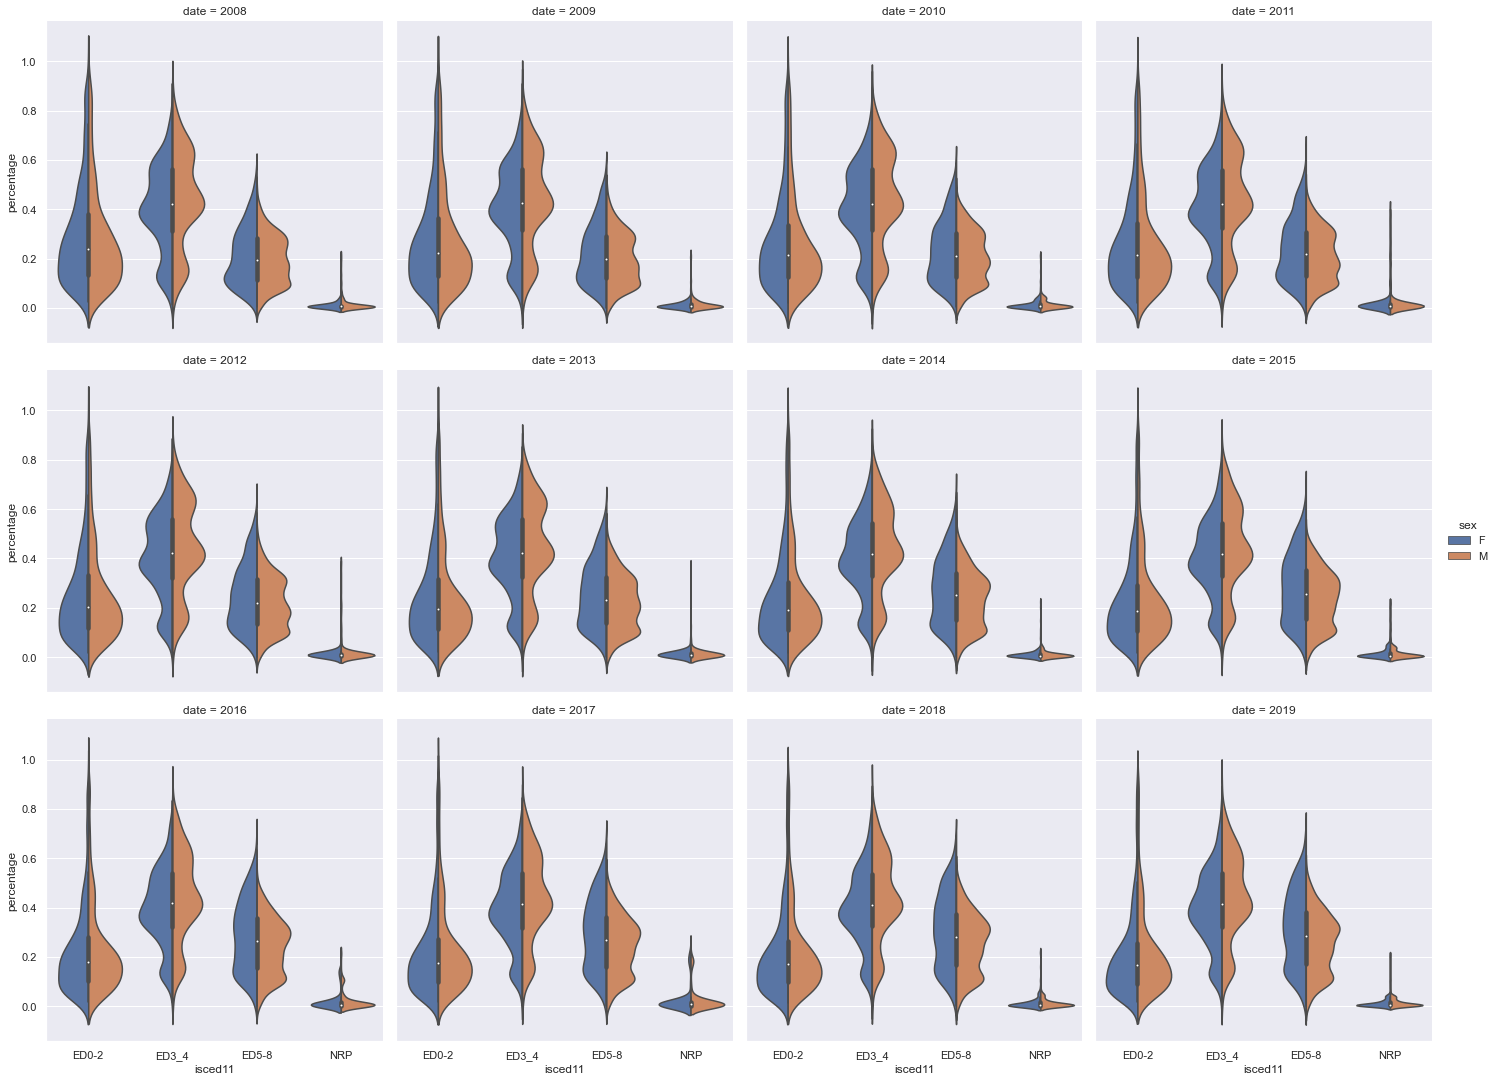

In [185]:
sns.catplot(x='isced11', y='percentage',col='date', hue='sex', split=True, col_wrap=4, data=clean_df, kind='violin')

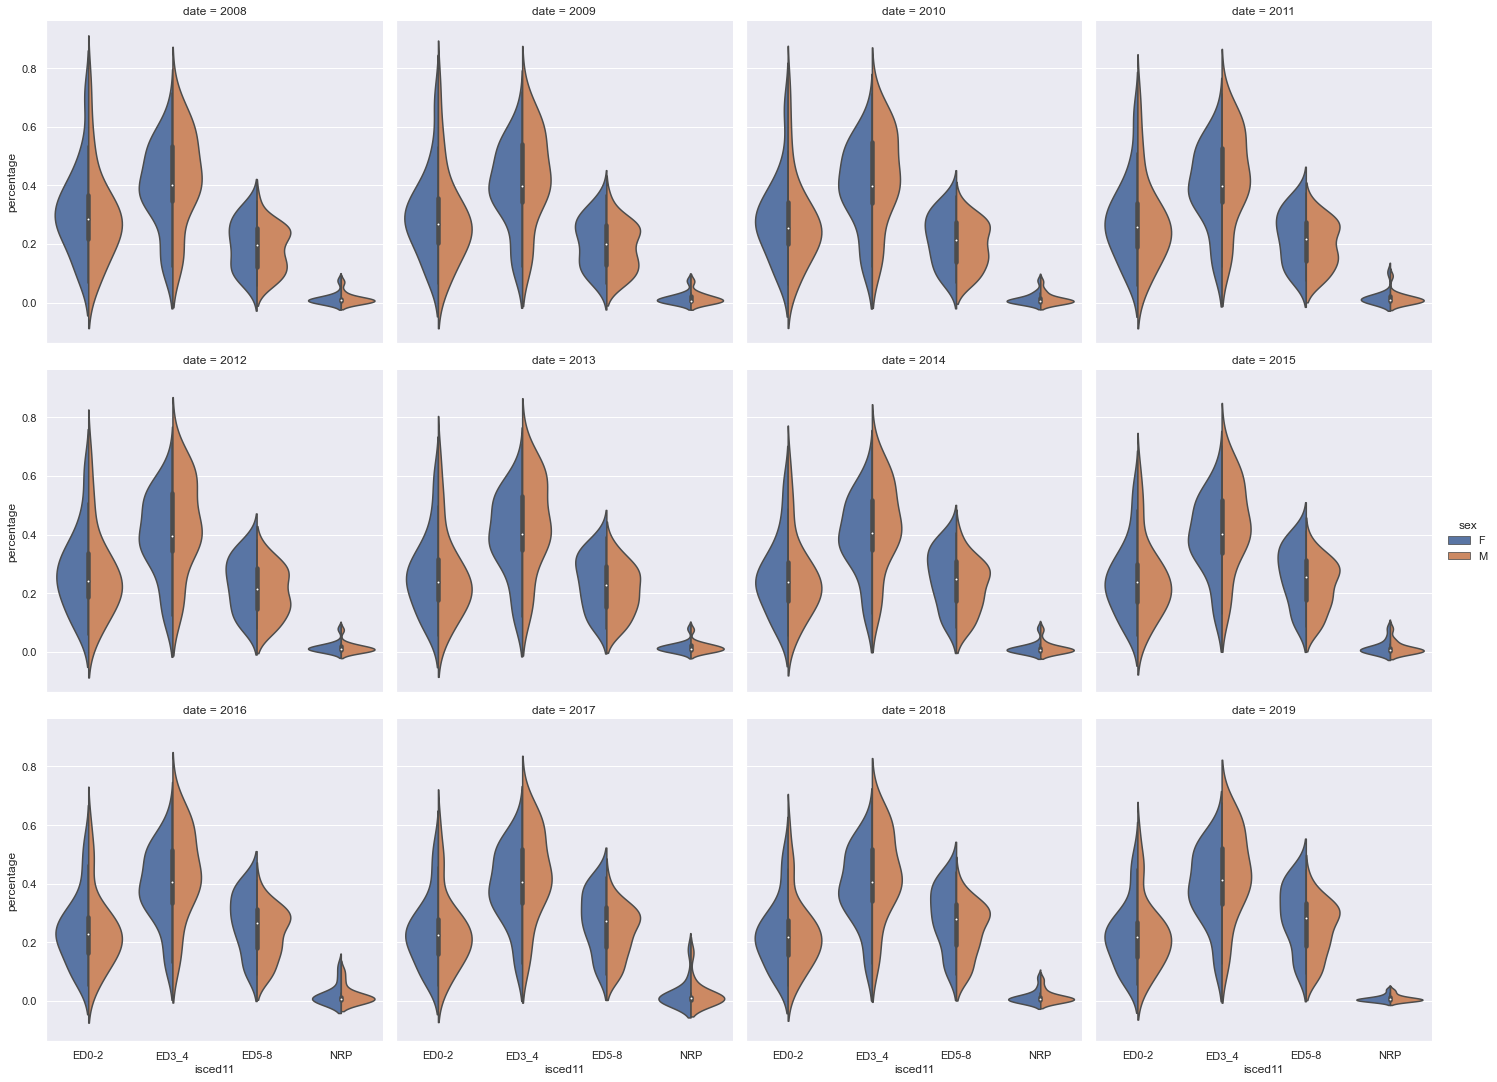

In [186]:
sns.catplot(x='isced11', y='percentage',col='date', hue='sex', split=True, col_wrap=4, data=clean_df[clean_df['age']=='Y15-74'], kind='violin')

In [177]:
# sample country 
geography_diff = 'UK'
geography_no_diff = 'LU'
age = 'Y15-74'

EX_UK_df = clean_df[(clean_df['geography']==geography_diff) & 
                (clean_df['age']==age)]


EX_LU_df = clean_df[(clean_df['geography']==geography_no_diff) & 
                (clean_df['age']==age)]



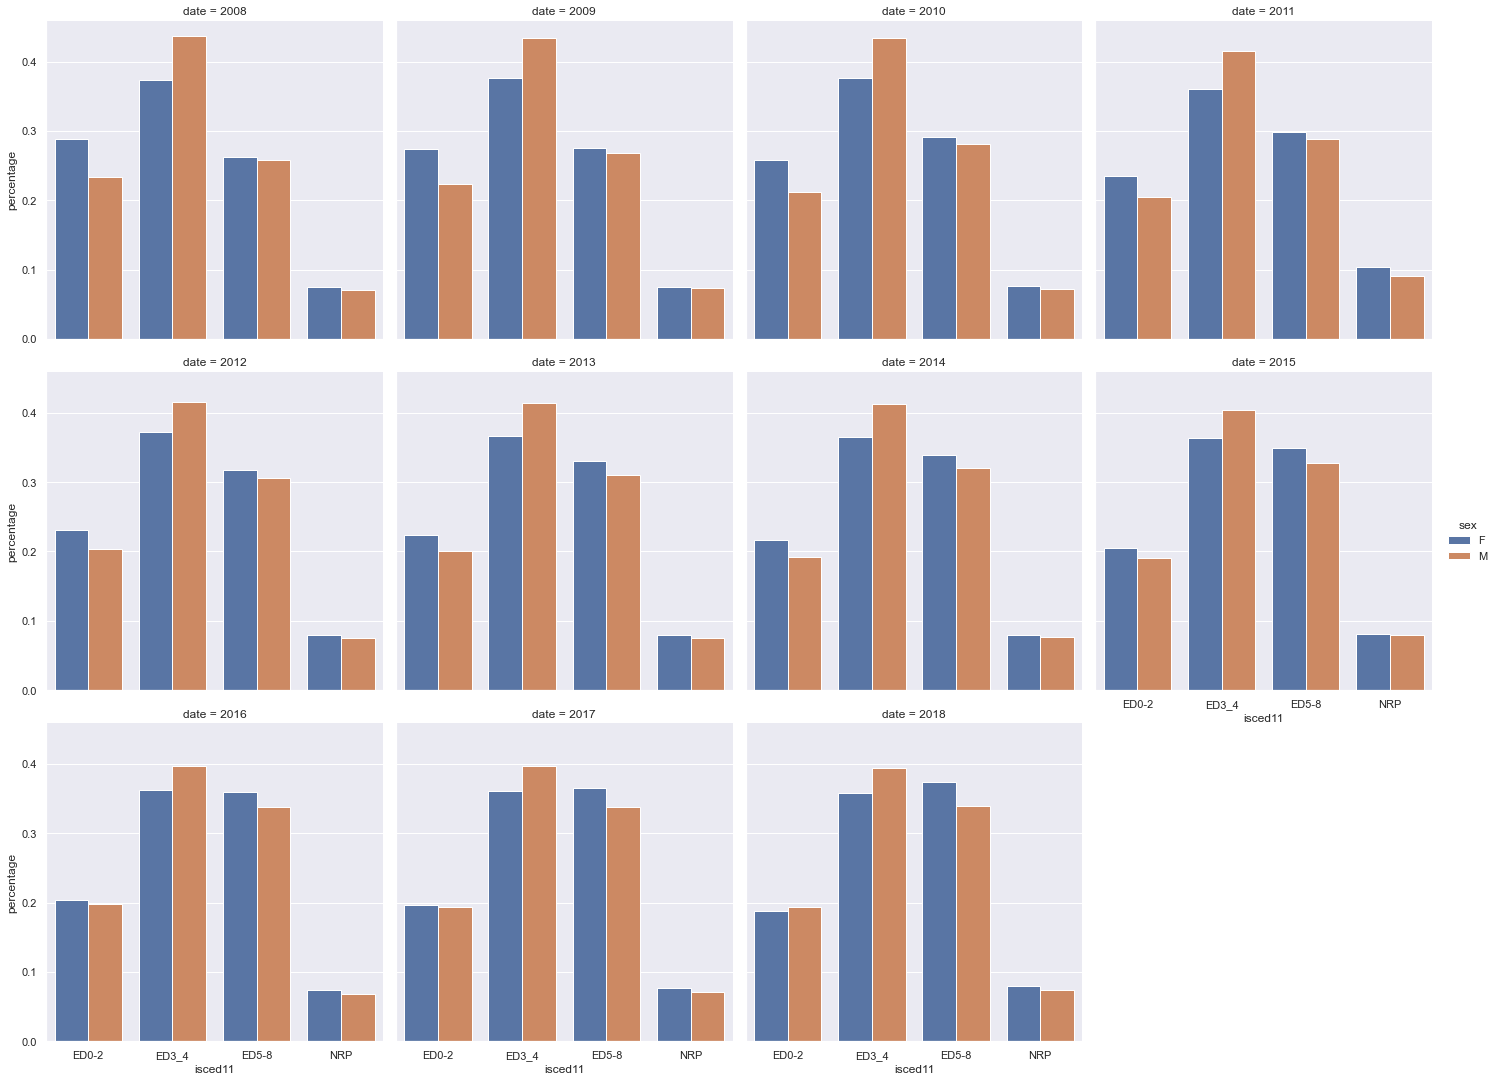

In [178]:
sns.catplot(x='isced11', y='percentage',col='date', hue='sex', col_wrap=4, data=EX_UK_df, kind='bar', ci=None)

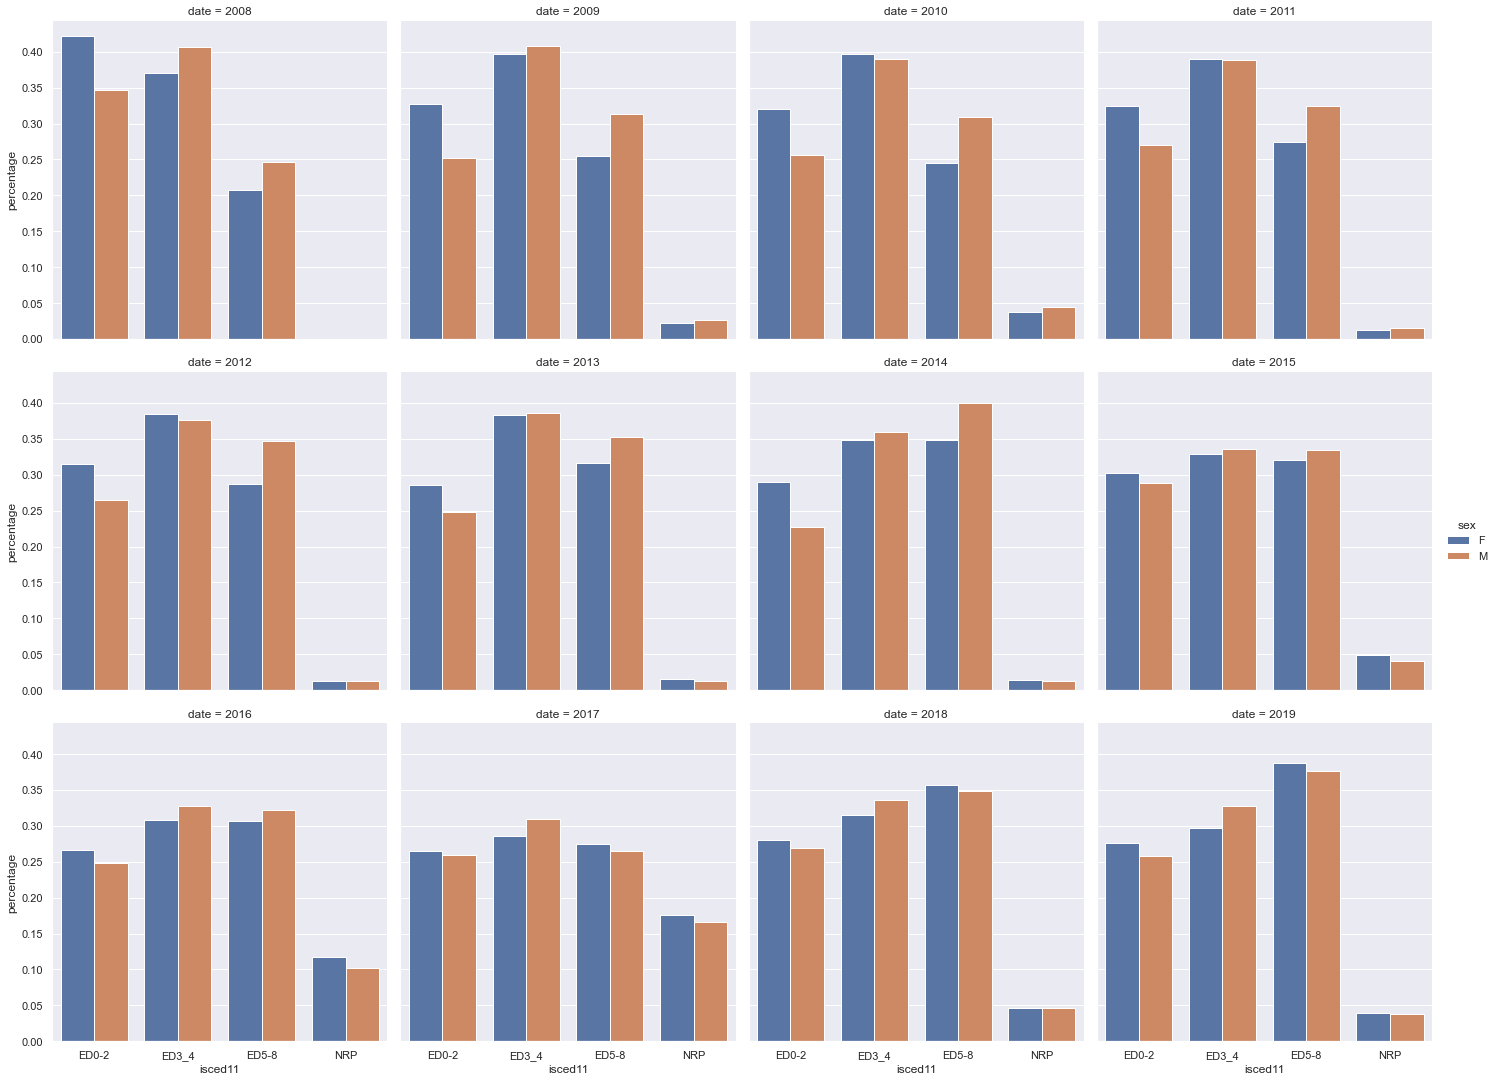

In [173]:
sns.catplot(x='isced11', y='percentage',col='date', hue='sex', col_wrap=4, data=EX_LU_df, kind='bar', ci=None)

In [191]:
yearly_pop_edu = clean_df.groupby(['sex', 'age', 'isced11','date'])['percentage']
yearly_pop_edu_stat = yearly_pop_edu.agg(['mean', 'median','var','std','sem']).reset_index()
yearly_pop_edu_stat

,sex,age,isced11,date,mean,median,var,std,sem
0,F,Y15-19,ED0-2,2008,0.718057,0.797986,0.041939,0.204790,0.035121
1,F,Y15-19,ED0-2,2009,0.714001,0.798903,0.043230,0.207917,0.035657
2,F,Y15-19,ED0-2,2010,0.711585,0.803922,0.044939,0.211987,0.036902
3,F,Y15-19,ED0-2,2011,0.704059,0.776162,0.042468,0.206079,0.035342
4,F,Y15-19,ED0-2,2012,0.694128,0.758764,0.042783,0.206841,0.036006
...,...,...,...,...,...,...,...,...,...
2779,M,Y65-69,NRP,2015,0.013646,0.006736,0.000295,0.017189,0.007687
2780,M,Y65-69,NRP,2016,0.026412,0.012448,0.001404,0.037468,0.016756
2781,M,Y65-69,NRP,2017,0.027584,0.005284,0.003489,0.059071,0.022327
2782,M,Y65-69,NRP,2018,0.016864,0.016864,0.000002,0.001263,0.000893


In [192]:
yearly_lf = life_df_ana.groupby(['sex', 'date'])['value']
yearly_lf_stat = yearly_lf.agg(['mean', 'median','var','std','sem']).sort_values(by=['mean']).reset_index()
yearly_lf_stat

,sex,date,mean,median,var,std,sem
0,M,2008,75.277419,77.10,16.713806,4.088252,0.734272
1,M,2009,75.616129,77.50,15.116065,3.887938,0.698294
2,M,2010,75.880000,77.65,14.899586,3.859998,0.704736
3,M,2011,76.358065,78.00,14.017183,3.743953,0.672434
4,M,2012,76.403333,78.05,13.923782,3.731458,0.681268
5,M,2013,76.856667,78.45,13.571506,3.683952,0.672595
6,M,2015,77.170968,78.70,13.173462,3.629526,0.651882
7,M,2014,77.209677,78.80,13.946237,3.734466,0.670730
8,M,2016,77.470968,79.00,13.232129,3.637599,0.653332
9,M,2017,77.587097,79.20,12.833828,3.582433,0.643424
